In [1]:
import numpy as np
import pandas as pd
import pickle
from sklearn import datasets # sklearn comes with some toy datasets to practise
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from matplotlib import pyplot
from sklearn.metrics import silhouette_score

In [2]:
song_database = pd.read_csv('song_database.csv')

In [3]:
song_database.drop(columns = ['Unnamed: 0'], inplace = True)

In [4]:
X = song_database._get_numeric_data()

In [5]:
X.describe()

,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
count,40784.000000,40784.000000,4.078400e+04,40784.000000,40784.000000,40784.000000,40784.000000,40784.000000,40784.000000,40784.000000,40784.000000,40784.000000,40784.000000
mean,0.368993,0.578148,2.250264e+05,0.561119,0.163283,5.269591,0.187684,-9.500388,0.639589,0.088604,119.943007,3.909033,0.455053
std,0.341402,0.174455,1.047415e+05,0.250654,0.315419,3.593985,0.159801,5.529760,0.480126,0.108055,29.377630,0.415256,0.248213
min,0.000001,0.000000,1.300000e+04,0.000020,0.000000,0.000000,0.012400,-51.919000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.046900,0.469000,1.758060e+05,0.384000,0.000000,2.000000,0.096500,-11.475250,0.000000,0.034700,97.008000,4.000000,0.253000
50%,0.260000,0.594000,2.144200e+05,0.584000,0.000069,5.000000,0.121000,-8.044500,1.000000,0.045900,120.025000,4.000000,0.440000
75%,0.689000,0.704000,2.574422e+05,0.762000,0.071100,8.000000,0.226000,-5.845000,1.000000,0.086000,138.776000,4.000000,0.647000
max,0.996000,0.986000,4.001882e+06,1.000000,1.000000,11.000000,1.000000,1.605000,1.000000,0.971000,228.447000,5.000000,0.997000


In [6]:
scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)
X_scaled_df = pd.DataFrame(X_scaled, columns = X.columns)
display(X.head())
print()
display(X_scaled_df.head())

,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,0.0171,0.440,329160.0,0.528,0.00203,0.0,0.2340,-7.809,1.0,0.0317,185.972,4.0,0.132
1,0.5780,0.604,224695.0,0.366,0.00000,5.0,0.1330,-7.519,1.0,0.0282,141.981,4.0,0.130
2,0.0383,0.591,141806.0,0.764,0.00000,1.0,0.1030,-5.484,1.0,0.0483,169.928,4.0,0.478
3,0.0203,0.736,212000.0,0.704,0.00000,3.0,0.0501,-7.409,0.0,0.0615,149.995,4.0,0.894
4,0.0558,0.627,197443.0,0.618,0.00000,2.0,0.3510,-8.529,1.0,0.0437,82.030,4.0,0.848


,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,-1.030744,-0.791896,0.994208,-0.132131,-0.511240,-1.466243,0.289841,0.305874,0.750669,-0.526625,2.247622,0.219065,-1.301531
1,0.612209,0.148188,-0.003164,-0.778447,-0.517676,-0.075013,-0.342205,0.358318,0.750669,-0.559017,0.750172,0.219065,-1.309588
2,-0.968647,0.073669,-0.794541,0.809417,-0.517676,-1.187997,-0.529941,0.726331,0.750669,-0.372997,1.701485,0.219065,0.092448
3,-1.021371,0.904841,-0.124369,0.570041,-0.517676,-0.631505,-0.860982,0.378210,-1.332145,-0.250836,1.022968,0.219065,1.768446
4,-0.917387,0.280029,-0.263351,0.226934,-0.517676,-0.909751,1.022012,0.175668,0.750669,-0.415569,-1.290556,0.219065,1.583119


In [7]:
X_scaled_df.columns

Index(['acousticness', 'danceability', 'duration_ms', 'energy',
       'instrumentalness', 'key', 'liveness', 'loudness', 'mode',
       'speechiness', 'tempo', 'time_signature', 'valence'],
      dtype='object')

In [8]:
X_scaled_df.describe()

,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
count,4.078400e+04,4.078400e+04,4.078400e+04,4.078400e+04,4.078400e+04,4.078400e+04,4.078400e+04,4.078400e+04,4.078400e+04,4.078400e+04,4.078400e+04,4.078400e+04,4.078400e+04
mean,2.976619e-16,-8.158413e-16,-3.840129e-16,-5.122885e-16,-1.442713e-14,4.442498e-16,2.273338e-16,5.736603e-16,-8.385581e-16,-8.093652e-17,-6.183183e-16,-8.806406e-16,2.945178e-16
std,1.000012e+00,1.000012e+00,1.000012e+00,1.000012e+00,1.000012e+00,1.000012e+00,1.000012e+00,1.000012e+00,1.000012e+00,1.000012e+00,1.000012e+00,1.000012e+00,1.000012e+00
min,-1.080829e+00,-3.314074e+00,-2.024307e+00,-2.238563e+00,-5.176761e-01,-1.466243e+00,-1.096904e+00,-7.671062e+00,-1.332145e+00,-8.199988e-01,-4.082851e+00,-9.413670e+00,-1.833338e+00
25%,-9.434559e-01,-6.256618e-01,-4.699284e-01,-7.066342e-01,-5.176761e-01,-9.097510e-01,-5.706169e-01,-3.571378e-01,-1.332145e+00,-4.988612e-01,-7.807059e-01,2.190654e-01,-8.140409e-01
50%,-3.192566e-01,9.086586e-02,-1.012639e-01,9.128758e-02,-5.174576e-01,-7.501265e-02,-4.172990e-01,2.632855e-01,7.506690e-01,-3.952087e-01,2.791030e-03,2.190654e-01,-6.064771e-02
75%,9.373437e-01,7.214102e-01,3.094880e-01,8.014380e-01,-2.922592e-01,7.597257e-01,2.397776e-01,6.610472e-01,7.506690e-01,-2.409577e-02,6.410736e-01,2.190654e-01,7.733223e-01
max,1.836589e+00,2.337897e+00,3.605927e+01,1.750965e+00,2.652744e+00,1.594464e+00,5.083371e+00,2.008319e+00,7.506690e-01,8.166301e+00,3.693468e+00,2.627249e+00,2.183416e+00


In [19]:
kmeans = KMeans(n_clusters=14, random_state=1234)
kmeans.fit(X_scaled_df)

KMeans(n_clusters=14, random_state=1234)

In [20]:
len(kmeans.labels_)

40784

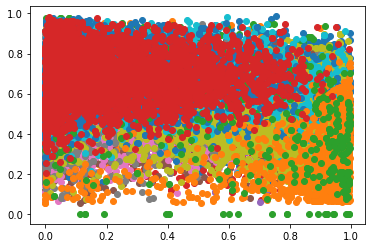

In [21]:
# assign a cluster to each example
labels = kmeans.predict(X_scaled_df)
# retrieve unique clusters
clusters = np.unique(labels)
# create scatter plot for samples from each cluster
for cluster in clusters:
    # get row indexes for samples with this cluster
    row_ix = np.where(labels == cluster)
    # create scatter of these samples
    pyplot.scatter(X.to_numpy()[row_ix, 0], X.to_numpy()[row_ix, 1])
    # show the plot
pyplot.show()

In [22]:
clusters = kmeans.predict(X_scaled_df)
#clusters
pd.Series(clusters).value_counts().sort_index()



0     2278
1     3904
2     5142
3     1826
4       94
5     1927
6     3489
7     2466
8     5975
9     2177
10    4286
11    1899
12     357
13    4964
dtype: int64

In [13]:
#X_df = pd.DataFrame(X)
X["cluster"] = clusters
X["cluster"]

0        7
1        6
2        7
3        8
4        1
        ..
40779    4
40780    1
40781    4
40782    3
40783    3
Name: cluster, Length: 40784, dtype: int32

In [14]:
X[X['cluster'] ==11].sample()

,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,cluster
17742,0.639,0.462,394392.0,0.704,0.0,4.0,0.655,-6.011,1.0,0.619,169.396,4.0,0.547,11


In [15]:
kmeans.inertia_

278314.430117022

In [16]:
kmeans2 = KMeans(n_clusters=50,
                init="k-means++",
                n_init=50,  # try with 1, 4, 8, 20, 30, 100...
                max_iter=10,
                tol=0,
                algorithm="elkan",
                random_state=1234)
kmeans2.fit(X_scaled_df)
print(kmeans2.inertia_)

183876.83021638397


Training a K-Means model with 2 clusters! 

Training a K-Means model with 3 clusters! 

Training a K-Means model with 4 clusters! 

Training a K-Means model with 5 clusters! 

Training a K-Means model with 6 clusters! 

Training a K-Means model with 7 clusters! 

Training a K-Means model with 8 clusters! 

Training a K-Means model with 9 clusters! 

Training a K-Means model with 10 clusters! 

Training a K-Means model with 11 clusters! 

Training a K-Means model with 12 clusters! 

Training a K-Means model with 13 clusters! 

Training a K-Means model with 14 clusters! 

Training a K-Means model with 15 clusters! 

Training a K-Means model with 16 clusters! 

Training a K-Means model with 17 clusters! 

Training a K-Means model with 18 clusters! 

Training a K-Means model with 19 clusters! 

Training a K-Means model with 20 clusters! 



Text(0.5, 1.0, 'Elbow Method showing the optimal k')

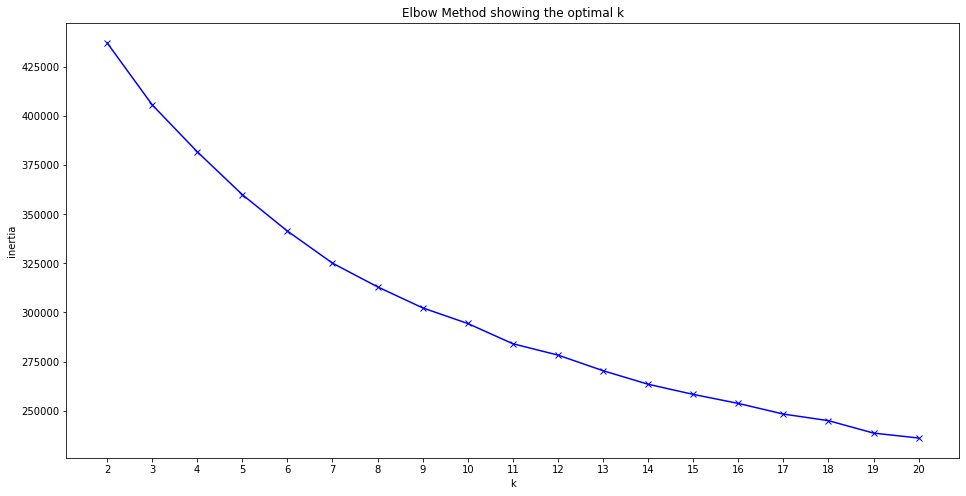

In [17]:
K = range(2, 21)
inertia = []

for k in K:
    print("Training a K-Means model with {} clusters! ".format(k))
    print()
    kmeans = KMeans(n_clusters=k,
                    random_state=1234)
    kmeans.fit(X_scaled_df)
    inertia.append(kmeans.inertia_)

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(16,8))
plt.plot(K, inertia, 'bx-')
plt.xlabel('k')
plt.ylabel('inertia')
plt.xticks(np.arange(min(K), max(K)+1, 1.0))
plt.title('Elbow Method showing the optimal k')

1 time
1 time
1 time
1 time
1 time
1 time
1 time
1 time
1 time
1 time
1 time
1 time
1 time
1 time
1 time
1 time
1 time
1 time


Text(0.5, 1.0, 'Silhouette Method showing the optimal k')

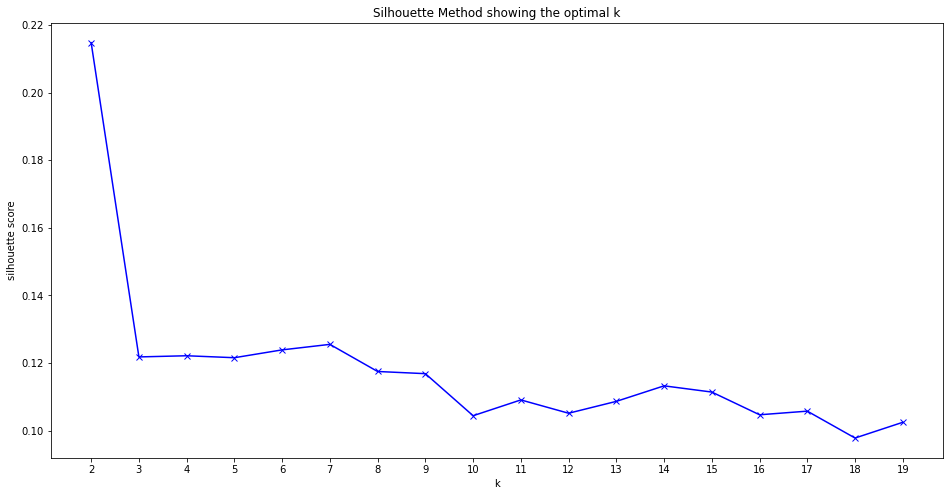

In [18]:
K = range(2, 20)
silhouette = []

for k in K:
    kmeans = KMeans(n_clusters=k,
                    random_state=1234)
    kmeans.fit(X_scaled_df)
    filename = "Model/kmeans_" + str(k) + ".pickle"
    with open(filename, "wb") as f:
        pickle.dump(kmeans,f)
    silhouette.append(silhouette_score(X_scaled_df, kmeans.predict(X_scaled_df)))
    print('1 time')
    
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(16,8))
plt.plot(K, silhouette, 'bx-')
plt.xlabel('k')
plt.ylabel('silhouette score')
plt.xticks(np.arange(min(K), max(K)+1, 1.0))
plt.title('Silhouette Method showing the optimal k')

ModuleNotFoundError: No module named 'yellowbrick'

In [48]:
import pickle

#scaler = StandardScaler()
#model = KMeans()

with open("Model/scaler.pickle", "wb") as f:
    pickle.dump(scaler,f)

with open("Model/kmeans_4.pickle", "wb") as f:
    pickle.dump(kmeans,f)

In [49]:
def load(filename = "filename.pickle"): 
    try: 
        with open(filename, "rb") as f: 
            return pickle.load(f) 
    except FileNotFoundError: 
        print("File not found!") 


In [50]:
scaler2 = load("Model/scaler.pickle")
scaler2

StandardScaler()

In [ ]:
# user input a song
## get the audio features for the song from spotify 
## scale the audio features with scaler that you build the Kmean on 
## predict for the user song(audio features) in which cluster belong to (e.g belongs to 7 )
## got the 100,000000 database and recommed a song that belong to the same cluster of the user input song 

In [ ]:
scaler2.fit(X)
